## Loading Library

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [143]:
#1

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/bread%20basket.csv')

# Show top 5 rows of the data
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [144]:
#2 info

df.info()
# We can see that the total rows are 20507 entries and total columns are 5
# The data types are object (4) and int64 (1)
# There is no null values in all of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
#3 check missing values

# Check for null values in the dataset where we find there is 0 null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

- The dataset contains 20,507 rows and 5 columns.
- Columns include: Transaction, Item, date_time, period_day, and weekday_weekend.
- Data Types: Four columns (Item, date_time, period_day, and weekday_weekend) are of type object (likely strings or categorical data).
- One column (Transaction) is of type int64 (integer).
- Missing Values: There are no null (missing) values in any of the columns, confirmed by both df.info() and df.isnull().sum() outputs.

This indicates the dataset is complete and ready for further preprocessing or analysis.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


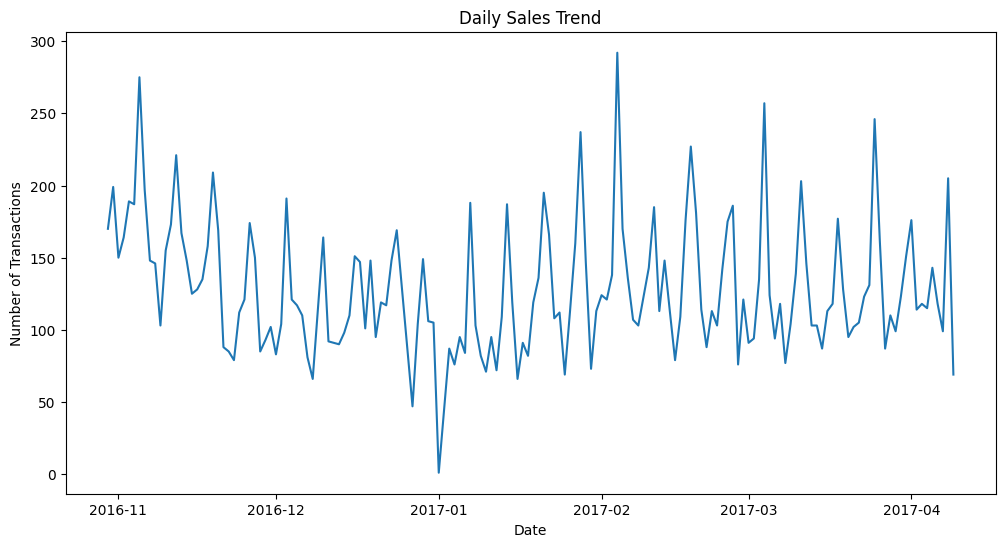

In [130]:
# 5

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Extract the date for daily trend analysis
df['date'] = df['date_time'].dt.date

# Group by date to count the number of transactions per day
daily_trends = df.groupby('date').size()

# Plot the daily transaction trends
plt.figure(figsize=(12, 6))
plt.plot(daily_trends.index, daily_trends.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [131]:
# 6

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Add new variables to the DataFrame
df['day'] = df['date_time'].dt.day  # Extract day
df['month'] = df['date_time'].dt.month  # Extract month (as integer)
df['year'] = df['date_time'].dt.year  # Extract year
df['time'] = df['date_time'].dt.time  # Extract time in HH:MM:SS format
df['hour'] = df['date_time'].dt.hour  # Extract hour
df['day_name'] = df['date_time'].dt.day_name()  # Extract day name (e.g., Monday)

# Display the updated DataFrame
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,date,day,month,year,time,hour,day_name
6139,3067,Pastry,2016-12-12 16:24:00,afternoon,weekday,2016-12-12,12,12,2016,16:24:00,16,Monday
17674,8399,Chicken Stew,2017-03-18 15:54:00,afternoon,weekend,2017-03-18,18,3,2017,15:54:00,15,Saturday
571,282,Pastry,2016-11-02 10:37:00,morning,weekday,2016-11-02,2,11,2016,10:37:00,10,Wednesday
18530,8792,Coffee,2017-03-25 13:43:00,afternoon,weekend,2017-03-25,25,3,2017,13:43:00,13,Saturday
11003,5492,Frittata,2017-01-28 11:00:00,morning,weekend,2017-01-28,28,1,2017,11:00:00,11,Saturday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


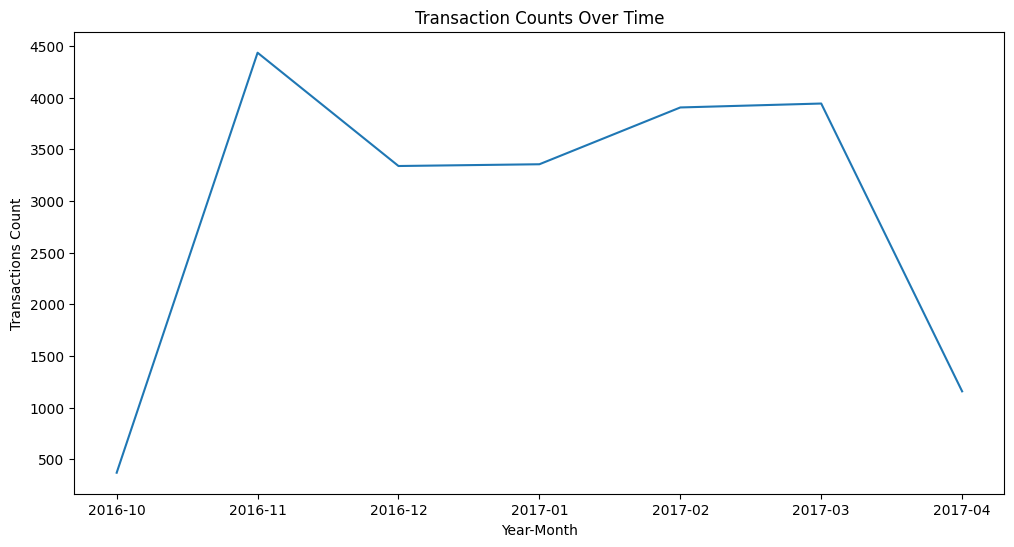

In [132]:
# 7

# Ensure 'date_time' is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Add a 'year-month' column for grouping, formatted as YYYY-MM
df['year_month'] = df['date_time'].dt.to_period('M').astype(str)

# Group by 'year_month' and count transactions
monthly_sales = df.groupby('year_month').size()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transactions Count')

plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Which we can now observe:
- Monthly Sales Trend: The graph will allow us to see the variation in transaction counts across months, which is crucial for identifying patterns or trends. For example, we may notice peak sales months, seasonal patterns, or sales dips.
- Pattern Identification: If there is a sharp increase or decrease in specific months, we can correlate it with external factors such as holidays, promotions, or seasonality.
- Analysis by Month: The visualization helps us analyze the total number of transactions each month, so we can identify months with high or low sales. For instance, the month of November 2016 (represented as 2016-11) might stand out as having a high volume of transactions, suggesting it might have been a key sales month.
- Actionable Insights:
If there's a noticeable drop in transactions after certain months, we can investigate further into possible reasons (e.g., product changes, pricing strategies, etc.).
Conversely, a sharp increase in certain months could signal successful campaigns, so these can be revisited or enhanced for future months.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [133]:
#9

# Extract unique weekday names
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()

# Extract unique weekend names
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

# Print the unique names
print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [134]:
#10

df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

# Group and aggregate data
grouped = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Create the pivot table
pivot_table = grouped.pivot_table(index='month', columns='day_name', values='total_transactions', fill_value=0)

# Rearrange columns to follow the desired day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table = pivot_table.astype(int)

# Display the result
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

- The table reveals that weekends, especially Saturdays, have the highest transaction volumes across all months, with Sundays also showing strong sales. Fridays tend to see higher activity than weekdays like Monday and Thursday, which have consistently lower transaction counts.
- November stands out as a peak month, likely due to holiday shopping, while April shows a noticeable dip in transactions. This suggests that businesses should prepare for higher demand on weekends, especially in November, and adjust staffing and inventory based on these trends.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


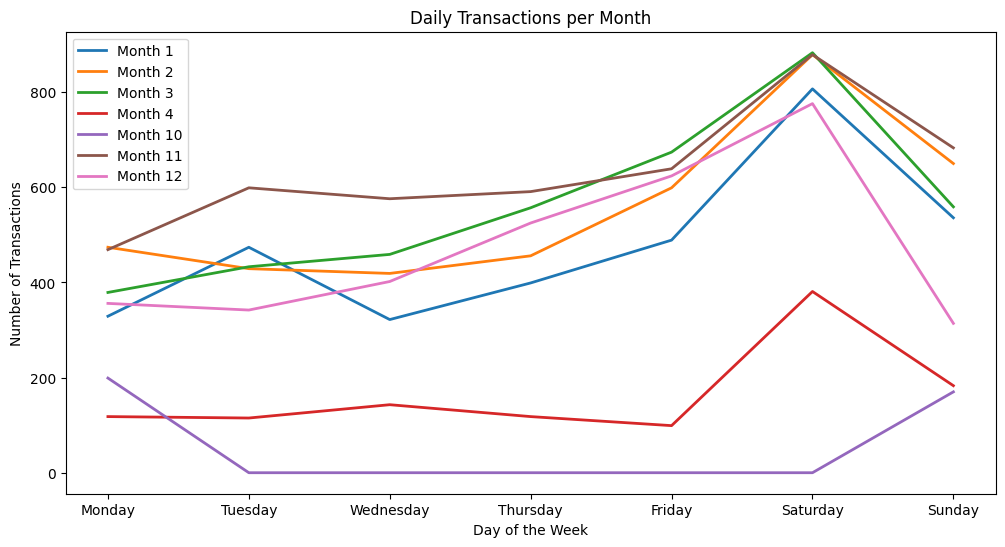

In [135]:
# 12

# Transpose the pivot table for easier plotting (days as rows and months as columns)
pivot_table_t = pivot_table.T

# Set up the figure for the plot, specifying the size of the figure
plt.figure(figsize=(12, 6))

# Loop over each month in the pivot table columns and plot the daily transaction data for that month
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

# Add the title and labels for the x and y axes
plt.title('Daily Transactions per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')

# Display the legend with the month labels, positioned in the upper left
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

After visualizing the daily transactions per month, you can gain insights into sales trends that:

- Vary by Month:
Some months (e.g., Month 3 and Month 10) show significantly higher transaction peaks during specific days, such as Friday and Saturday.
Other months (like Month 4 and Month 11) exhibit steadier trends throughout the week.
- Day of the Week Impact:
Across most months, Friday and Saturday tend to see the highest transaction volumes, indicating peak consumer activity during the weekend.
Tuesday generally has lower transaction numbers compared to other weekdays.
- Seasonal Patterns:
There may be months with particularly high activity, such as holiday or sales seasons (e.g., Month 12 could be December with high weekend activity, if this is a year-end trend).

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [136]:
# 14

# Get the unique values in the 'period_day' column
unique_periods = df['period_day'].unique()
print(unique_periods)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [137]:
# 15

# Get the unique hours for each period
morning_hours = df.loc[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df.loc[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df.loc[df['period_day'] == 'evening']['hour'].unique()
night_hours = df.loc[df['period_day'] == 'night']['hour'].unique()

# Display the unique hours for each period
print(f"Unique morning_hour: {morning_hours}")
print(f"Unique afternoon_hour: {afternoon_hours}")
print(f"Unique evening_hour: {evening_hours}")
print(f"Unique night_hour: {night_hours}")

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The results above show an inconsistency in the classification of time periods. Specifically, while "morning" includes the hour 7 (likely 7 AM), there is no representation of 12 AM (midnight), which would typically belong to the "night" period. Additionally, "morning" starts at 1 AM, which is unusual, as most standard time conventions classify 1 AM as part of "night."

This discrepancy suggests that the time ranges for these periods might not have been defined logically or consistently.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


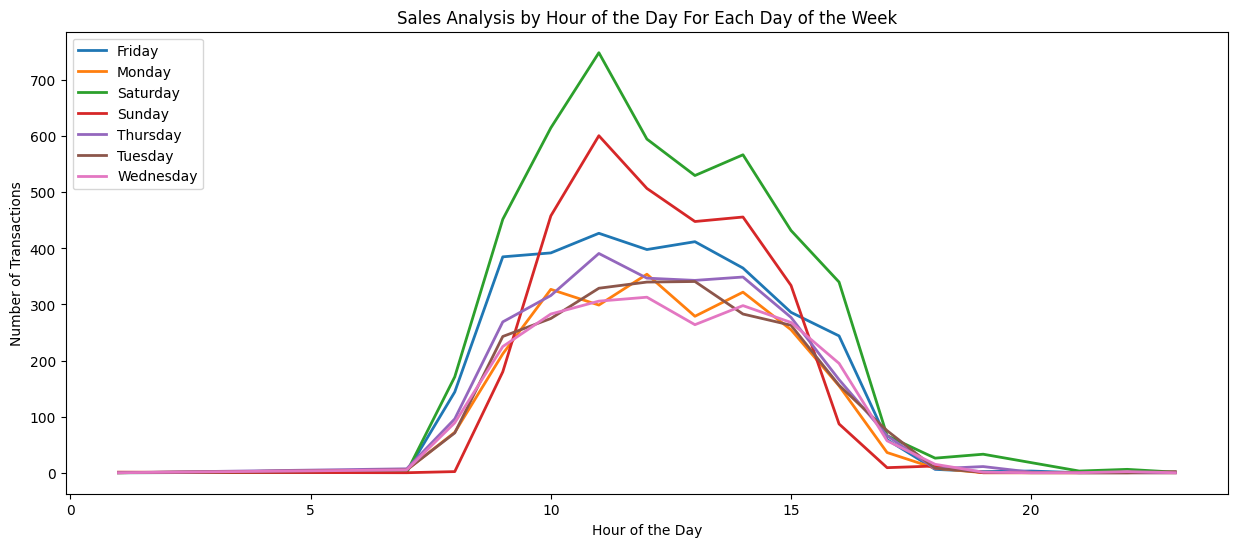

In [138]:
# 17

# Aggregate the total number of transactions by hour for each day of the week
sales_by_hour = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Plot the line chart for each day
plt.figure(figsize=(15, 6))

for day in sales_by_hour.columns:
  plt.plot(sales_by_hour.index, sales_by_hour[day], label=day, linewidth=2, markersize=6)

# Add title and labels
plt.title('Sales Analysis by Hour of the Day For Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Add a legend for the days of the week
plt. legend(loc='upper left', bbox_to_anchor=(0, 1))

# Show the plot
plt.show()

18. The daily sales trend plot reveals that _______

- Peak Hours:
The highest number of transactions typically occurs around 11 AM to 1 PM, especially on Saturday (red line), which has the highest overall peak.
Sunday (blue line) also shows a strong peak during late morning hours.
- Gradual Decline:
After the peak hours, transactions generally decline in the afternoon across all days.
- Day-Specific Observations:
Saturday experiences the most transactions, particularly during the peak hours.
Weekdays like Tuesday and Wednesday (brown and pink lines, respectively) have flatter trends, indicating fewer transactions compared to weekends.
- Early and Late Hours:
Minimal activity is observed during early morning (before 7 AM) and late evening (after 8 PM) for all days

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


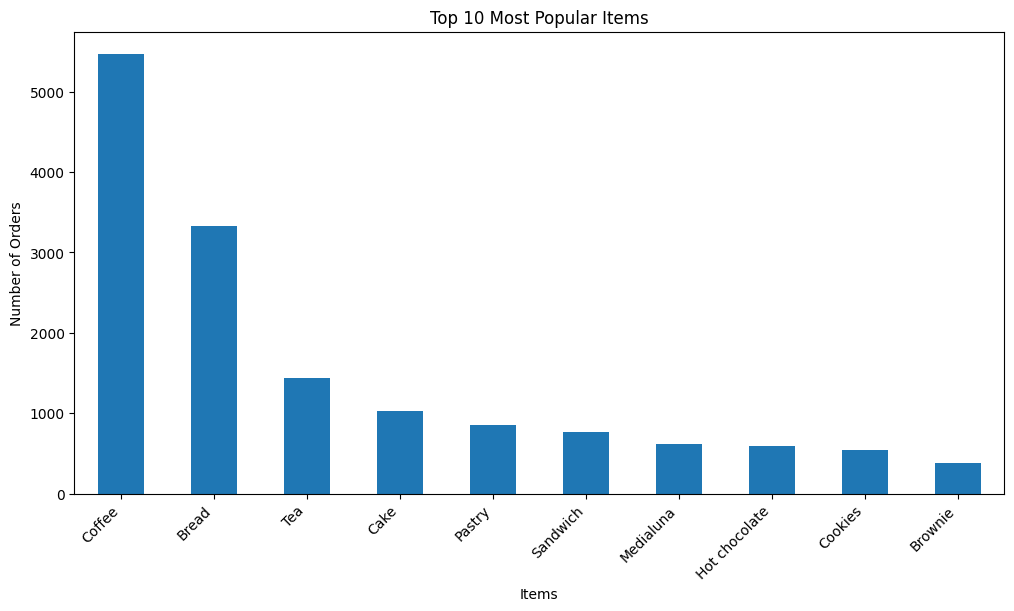

In [139]:
# 19

# Count the frequency of each item in the dataset
item_counts = df['Item'].value_counts().head(10)

# Plot the bar chart for the 10 most popular items
plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar')

# Add title and labels
plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number of Orders')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


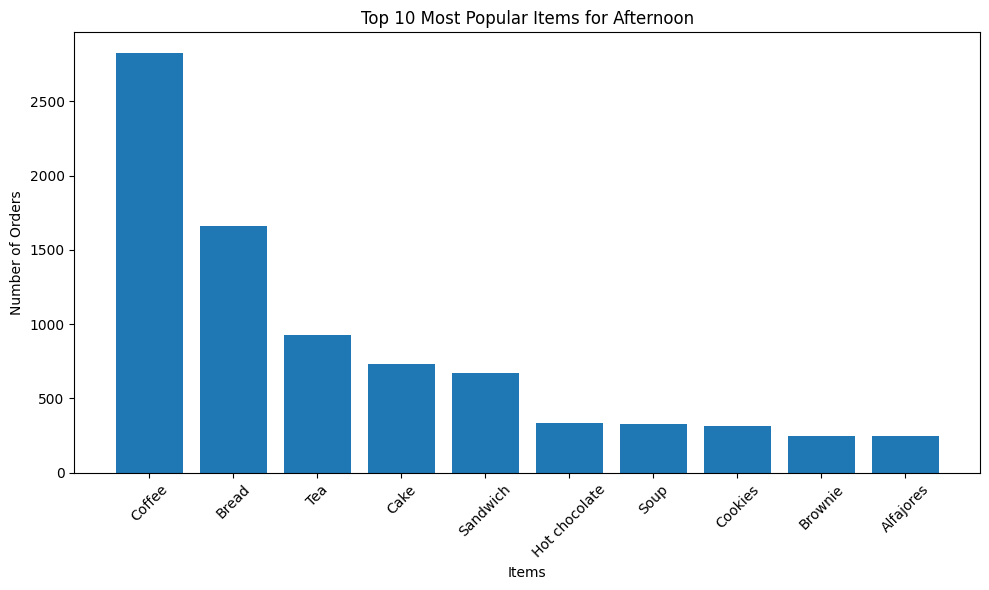

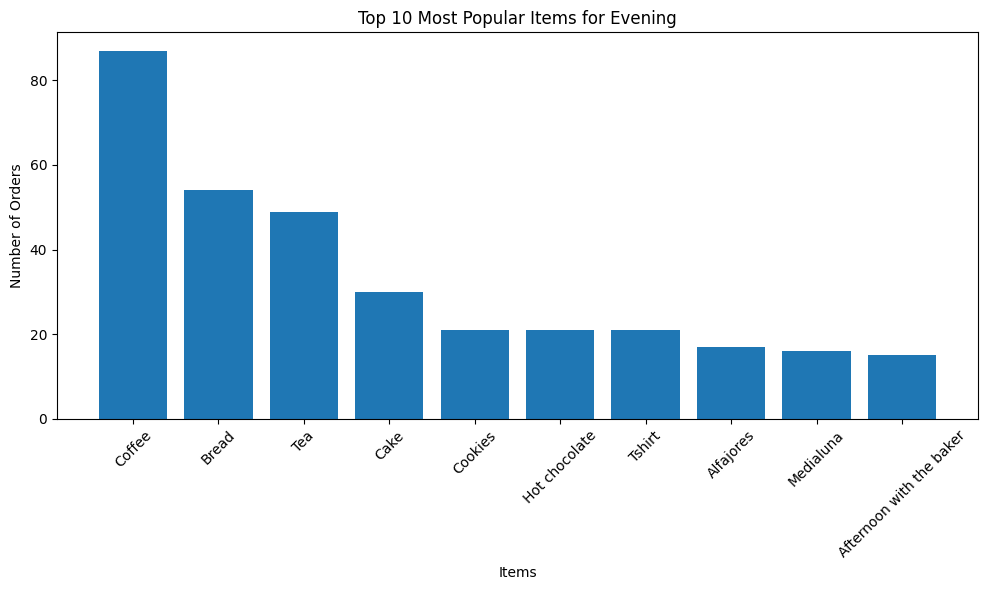

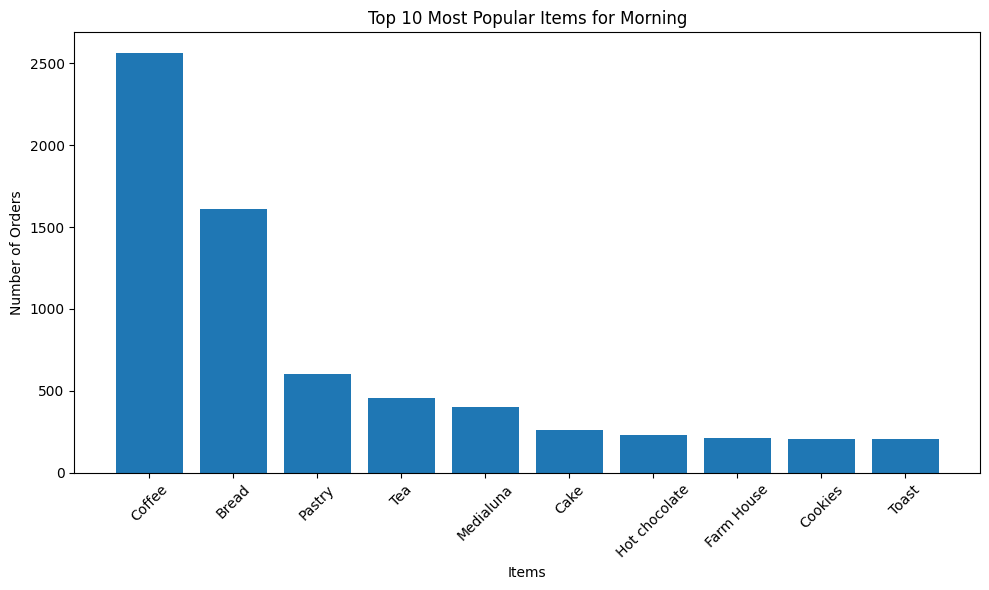

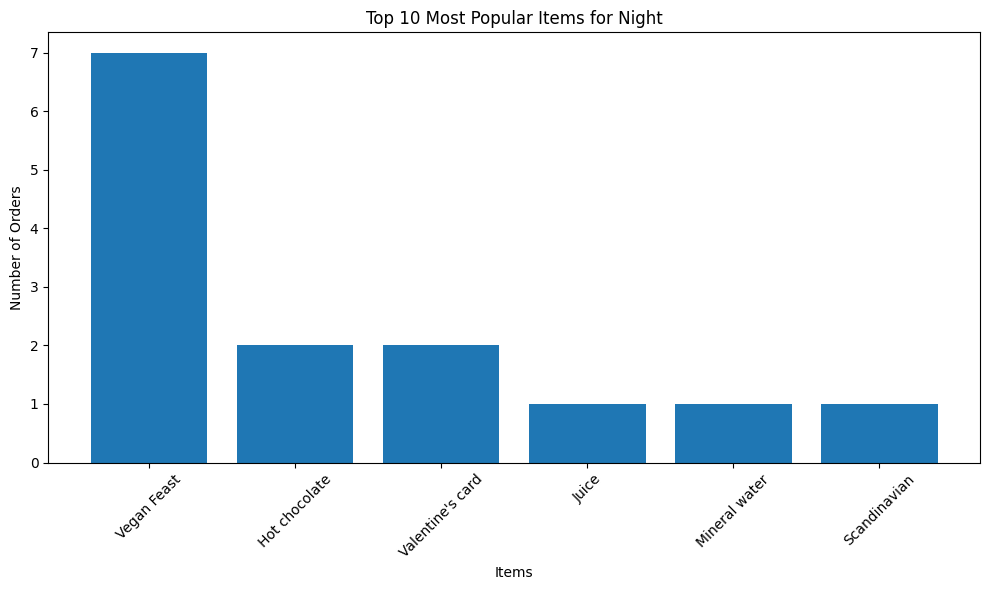

In [140]:
# 20

# Filter out 'unknown' periods
top_items_by_period = top_items_by_period[top_items_by_period['period_day'] != 'unknown']

# Group and plot the top items for each period
periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))

    plt.bar(data['Item'], data['count'])

    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period.capitalize()}')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


The analysis reveals an interesting shift in consumer preferences throughout the day. While coffee consistently stands out as the most popular item during the morning, afternoon, and evening, the trend changes significantly at night.

During nighttime hours, the Vegan Feast emerges as the most ordered item, indicating a distinct consumer behavior pattern.

This suggests that while coffee dominates as a staple choice during active hours, there is a notable demand for substantial or specific meal options like the Vegan Feast during nighttime, likely catering to late diners or individuals seeking a healthy dinner alternative.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


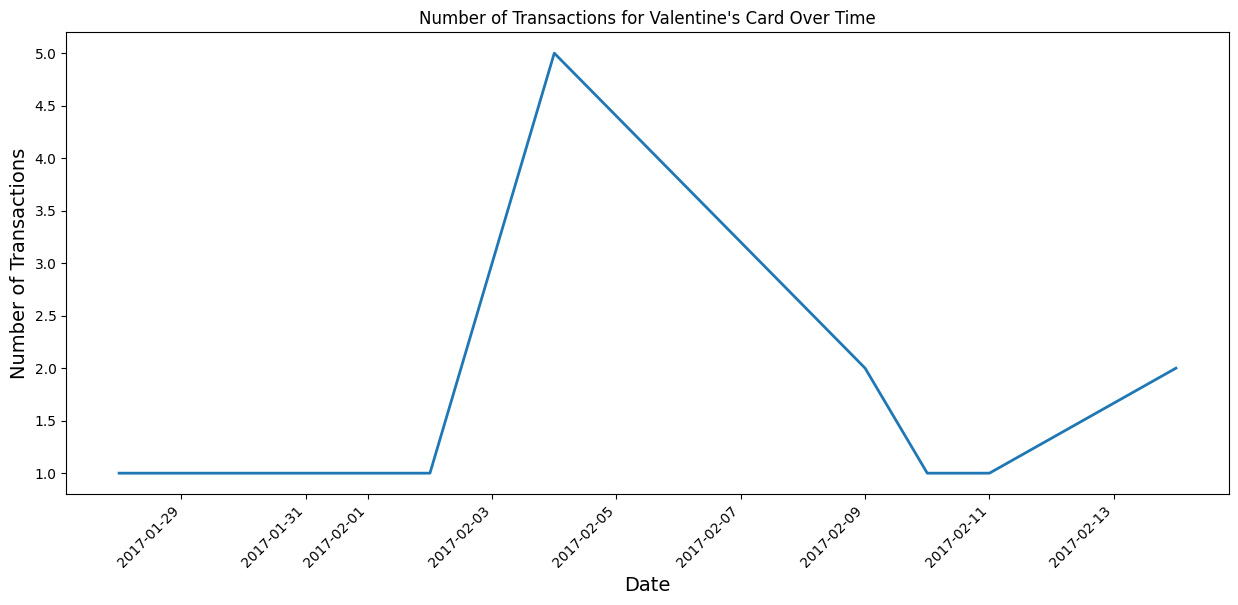

In [141]:
#22

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Filter the dataframe to include only the rows for the Valentine's card
valentine_sales = df[df['Item'] == 'Valentine\'s card']

# Group by 'date' and count the number of transactions per day
valentine_sales_daily = valentine_sales.groupby('date').size()

# Plot the line chart
plt.figure(figsize=(15, 6))
valentine_sales_daily.plot(kind='line', linewidth=2, markersize=5)

# Add title and labels with improved style
plt.title('Number of Transactions for Valentine\'s Card Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


From the chart, the insight can be summarized as:

- Sales of Valentine's cards increase sharply as the date approaches February 14th, likely driven by people preparing for Valentine's Day.
- The number of transactions peaks significantly and then drops steeply after February 7th, indicating that most purchases are made well before Valentine's Day itself.
- A slight uptick after February 11th suggests some last-minute buyers, though overall sales decrease closer to Valentine's Day.

This pattern reflects consumer behavior tied to seasonal events like Valentine's Day, where early planning and last-minute shopping both play roles.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [146]:
# 24

apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-147-024034fe465c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [148]:
# 26

frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [149]:
# 27

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
rules.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
14,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
16,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



From the provided association rule metrics in The Bread Basket dataset, here are key insights I can include in my report:

1. Coffee as a Central Item
Coffee appears frequently as a consequent in multiple rules, indicating it is a commonly purchased item in combination with others.
The highest confidence values involve items like Medialuna (56.93%), Pastry (55.21%), and Juice (53.42%) as antecedents, suggesting customers are likely to pair these with coffee.
2. Complementary Item Insights
Cake and Tea have a relatively high lift (1.60), showing they are strongly associated as a pair.
The combination of Toast and Coffee has a high lift value (1.47), making it a significant pairing.
3. High Lift Relationships
Relationships with high lift indicate strong association. Examples include:
(Cake → Tea): Lift of 1.60
(Toast → Coffee): Lift of 1.47
(Medialuna → Coffee): Lift of 1.19
4. Bread and Pastry Connection
Although less significant in terms of lift and confidence, the pairing of Bread → Pastry (Lift = 1.03) suggests occasional cross-buying.
5. Consumer Habits
Items with moderate to high confidence (e.g., Juice → Coffee, Pastry → Coffee) reflect habitual purchases, where beverages like coffee are consistently purchased with specific food items.
6. Zhang's Metric Highlights
Higher Zhang's metric scores (e.g., Toast → Coffee at 0.615122) further emphasize strong rules where dependencies exist.

This analysis offers actionable insights, such as bundling popular items (e.g., coffee with pastries or toast) or promoting less frequent combinations like Bread → Pastry to increase cross-sales.

These insights could help tailor marketing strategies and product placements for maximum customer satisfaction and sales.